In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
url = "WA_Fn-UseC_-HR-Employee-Attrition.csv"

In [3]:
data = pd.read_csv(url)

In [4]:
data

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


In [5]:
for i in data:
    print(i)

Age
Attrition
BusinessTravel
DailyRate
Department
DistanceFromHome
Education
EducationField
EmployeeCount
EmployeeNumber
EnvironmentSatisfaction
Gender
HourlyRate
JobInvolvement
JobLevel
JobRole
JobSatisfaction
MaritalStatus
MonthlyIncome
MonthlyRate
NumCompaniesWorked
Over18
OverTime
PercentSalaryHike
PerformanceRating
RelationshipSatisfaction
StandardHours
StockOptionLevel
TotalWorkingYears
TrainingTimesLastYear
WorkLifeBalance
YearsAtCompany
YearsInCurrentRole
YearsSinceLastPromotion
YearsWithCurrManager


In [6]:
ex = {'Country': ['Belgium',  'India',  'Brazil'],

'Capital': ['Brussels',  'New Delhi',  'Brasilia'],

'Population': [11190846, 1303171035, 207847528]}

In [7]:
def update_data(i,data_add, data):
    for t in data.keys():
        data_add[t].append(data[t][i])
    return data_add

In [8]:
data_1 = {}
data_0 = {}
for i in data.keys():
    data_1.update({i : []})
    data_0.update({i : []})


In [9]:
for i in range(1470):
    if data["Attrition"][i] == "No":
        data_0 = update_data(i,data_0,data)
    else:
        data_1 = update_data(i,data_1,data)

In [10]:
def count_data(data, value):
    count = 0
    for i in range(len(data)):
        if value == data[i]:
            count += 1
    return count

In [11]:
def plot_data(label, data_0, data_1,):
    labels = set(data_0[label] + data_1[label])
    count_0 = []
    count_1 = []
    for i in labels:
        count_0.append(count_data(data_0[label], i))
        count_1.append(count_data(data_1[label], i))
    
    x = np.arange(len(labels))  # the label locations
    width = 0.3  # the width of the bars

    fig, ax = plt.subplots()
    rects1 = ax.bar(x - width/2, count_0, width, label='NO')
    rects2 = ax.bar(x + width/2, count_1, width, label='YES')

    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_title(label)
    ax.set_xticks(x)
    ax.set_xticklabels(labels)
    ax.legend()

    ax.bar_label(rects1, padding=3)
    ax.bar_label(rects2, padding=3)

    fig.tight_layout()

    plt.show()

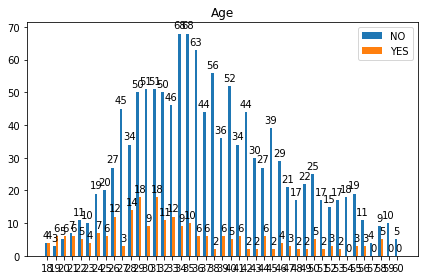

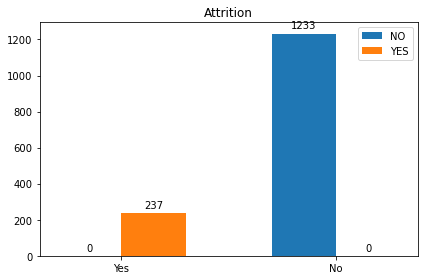

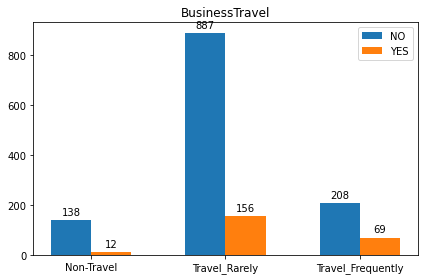

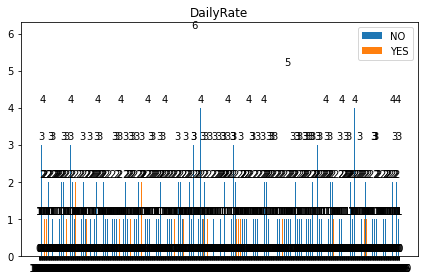

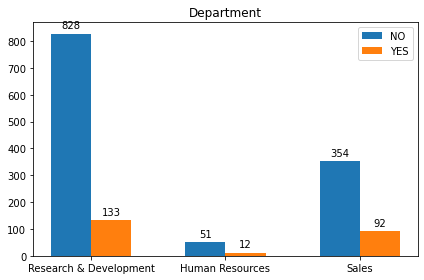

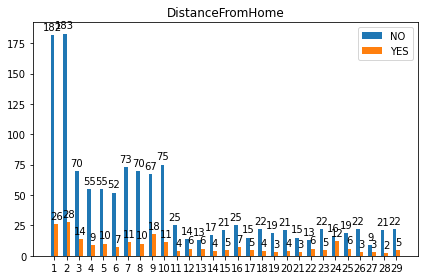

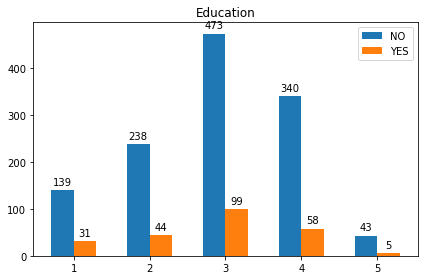

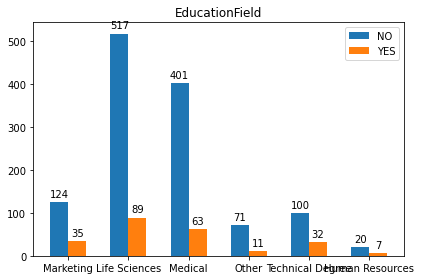

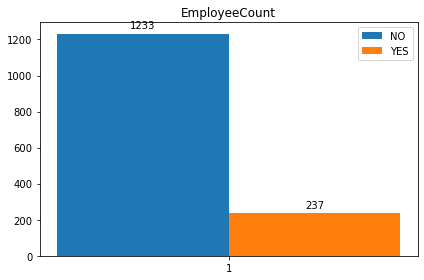

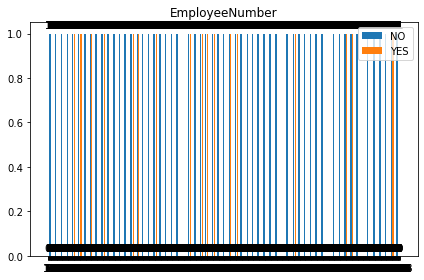

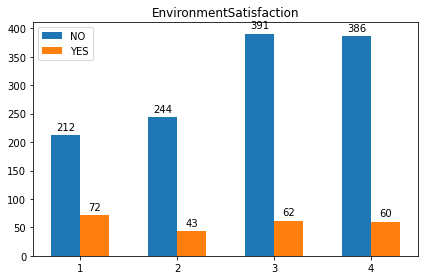

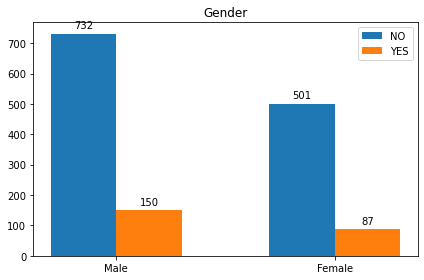

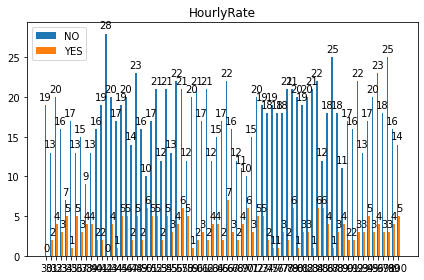

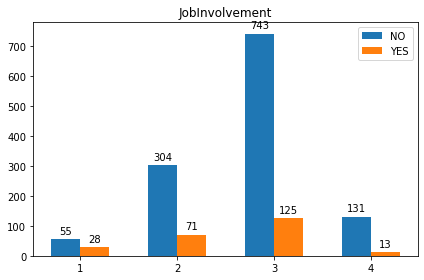

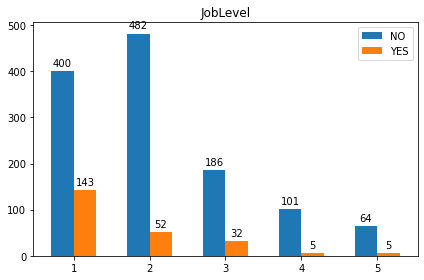

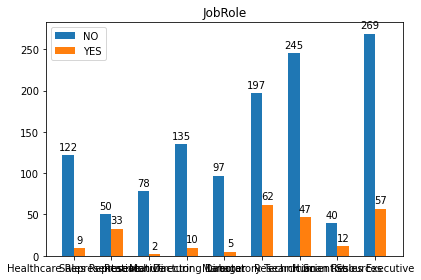

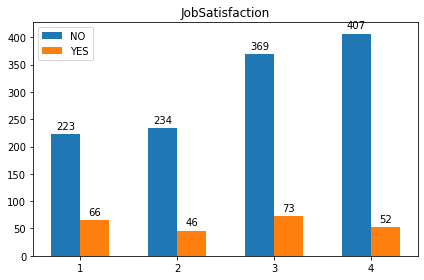

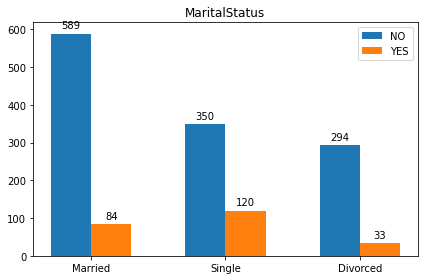

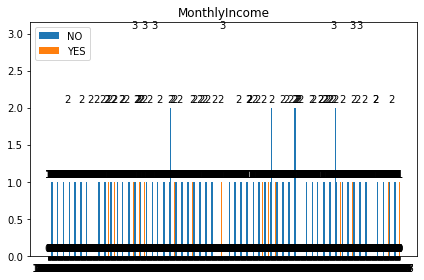

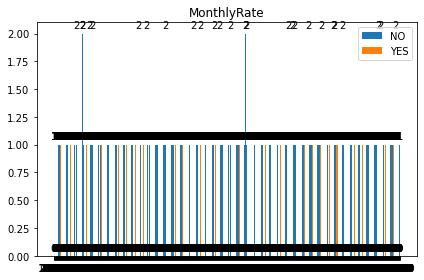

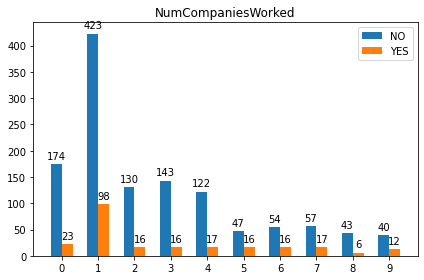

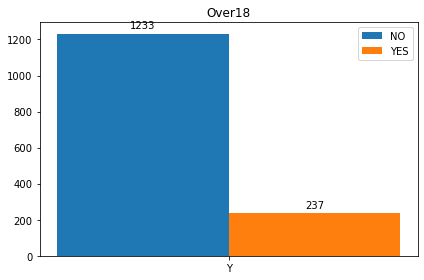

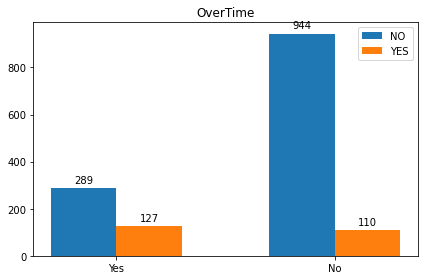

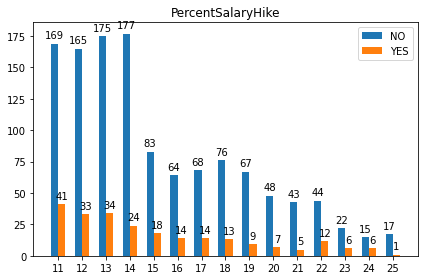

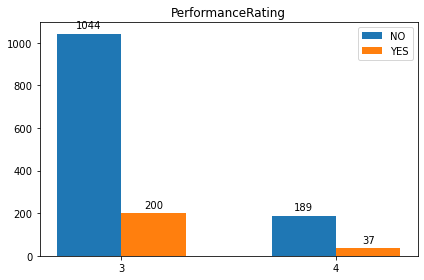

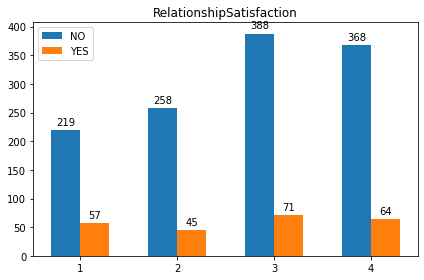

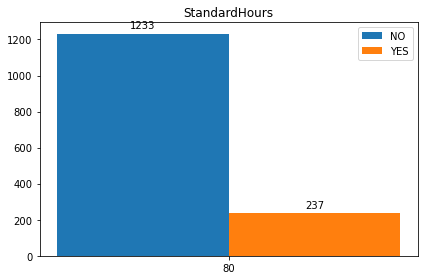

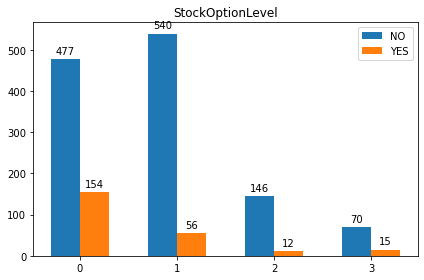

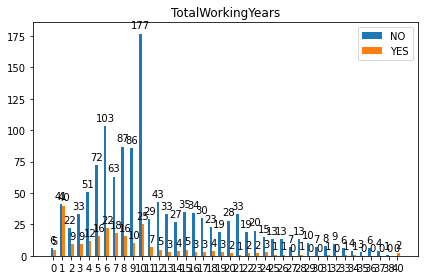

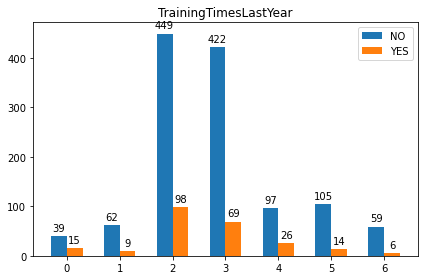

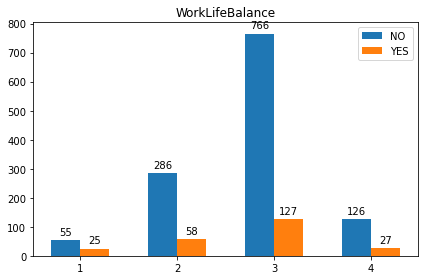

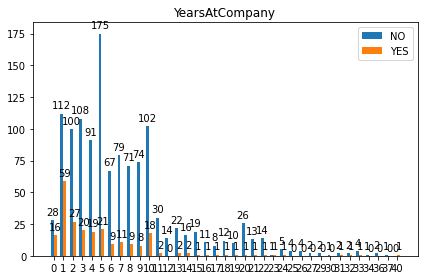

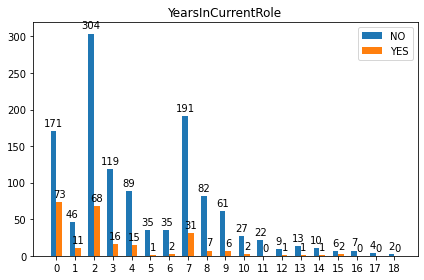

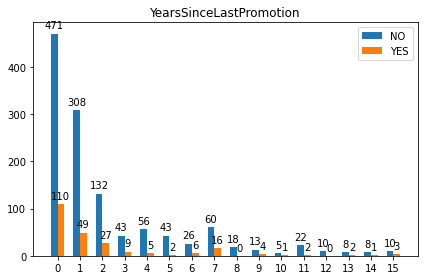

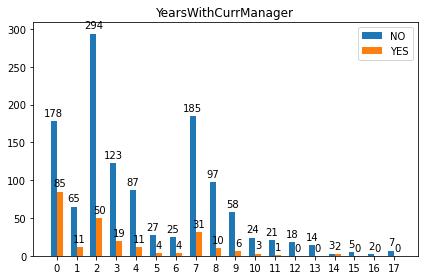

In [12]:
for i in data:
    plot_data(i, data_0, data_1)

In [13]:
#EnvironmentSatisfaction
#JobLevel
#JobRole
#JobSatisfaction
#MartialStatus

In [14]:
import math
def text_to_int(arr):
    ar_mask = list(set(arr))
    arr = list(arr)
    for i in range(len(ar_mask)):
        for j in range(len(arr)):
            if arr[j] == ar_mask[i]:
                arr[j]= i+1
    arr = np.array(arr)
    return arr
def t_test(group1, group2):
    if type(group1[0]) is str:
        group1 = text_to_int(group1)
        group2 = text_to_int(group2)
    mean1 = sum(group1) / len(group1)
    mean2 = sum(group2) / len(group2)
    var = 1
    n1 = len(group1)
    n2 = len(group2)
    s1 = math.sqrt(sum((mean1 - group1)**2)/(n1-1))
    s2 = math.sqrt(sum((mean2 - group2)**2)/(n2-1))
    ktc1 = [mean1 + 1.96*s1, mean1 - 1.96*s1]
    ktc2 = [mean2 + 1.96*s2, mean2 - 1.96*s2]
    ar1 = [n1, var, mean1, s1, ktc1]
    ar2 = [n2, var, mean2, s2, ktc2]
    labels = ["N", "var", "mean", "s", "ktc"]
    pd.DataFrame([ar1, ar2], columns = labels)
    print(pd.DataFrame([ar1, ar2], columns = labels))
    mean = (mean1 + mean2)/2
    s = math.sqrt((sum((mean - group1)**2) + sum((mean - group1)**2))/(n1+n2-1))
    if s == 0:
        s = 0.00000000000000001
    t = (mean1 - mean2)/math.sqrt(s)
    print("t = " + str(t))

In [15]:
group1= data['EnvironmentSatisfaction'][data['Attrition'] == 'Yes']
group2= data['EnvironmentSatisfaction'][data['Attrition'] == 'No']

In [16]:
group1

0       2
2       4
14      3
21      3
24      2
       ..
1438    4
1442    1
1444    4
1452    2
1461    4
Name: EnvironmentSatisfaction, Length: 237, dtype: int64

In [17]:
t_test(group1, group2)

      N  var      mean         s                                      ktc
0   237    1  2.464135  1.169791  [4.756925933201968, 0.1713441089921255]
1  1233    1  2.771290  1.071132  [4.870708833667289, 0.6718702417585027]
t = -0.3755860361120276


In [18]:
t_test(data['JobLevel'][data['Attrition'] == 'Yes'], data['JobLevel'][data['Attrition'] == 'No'])

      N  var      mean         s                                        ktc
0   237    1  1.637131  0.940594  [3.480695128906066, -0.20643352553053895]
1  1233    1  2.145985  1.117933   [4.337134666766387, -0.0451638638466787]
t = -0.6846430763304708


In [19]:
t_test(data['JobSatisfaction'][data['Attrition'] == 'Yes'], data['JobSatisfaction'][data['Attrition'] == 'No'])

      N  var      mean         s                                       ktc
0   237    1  2.468354  1.118058  [4.659748062341793, 0.27696079841770027]
1  1233    1  2.778589  1.093277   [4.921412512773529, 0.6357651027982478]
t = -0.3878368108476678


In [20]:
print(type(data["BusinessTravel"][0]) is str)

True


In [21]:
for i in data:
    if i == 'Attrition':
        continue
    print(i)
    t_test(data[i][data['Attrition'] == 'Yes'], data[i][data['Attrition'] == 'No'])

Age
      N  var       mean        s                                       ktc
0   237    1  33.607595  9.68935   [52.59872073159804, 14.616469141819685]
1  1233    1  37.561233  8.88836  [54.982418414566354, 20.140047116658295]
t = -1.669834305939444
BusinessTravel
      N  var      mean         s                                      ktc
0   237    1  2.240506  0.533977  [3.287102184017521, 1.1939104742103266]
1  1233    1  2.056772  0.526895   [3.089486537315369, 1.024057663820073]
t = 0.3315265521100849
DailyRate
      N  var        mean           s                                       ktc
0   237    1  750.362869  401.899519  [1538.0859272375678, -37.36018884094358]
1  1233    1  812.504461  403.208379      [1602.792883603352, 22.216037726737]
t = -4.110965680696881
Department
      N  var      mean         s                                         ktc
0   237    1  1.827004  0.960903  [3.7103750207496535, -0.05636658193108812]
1  1233    1  1.615572  0.900839  [3.3812158525892775

      N  var      mean         s                                      ktc
0   237    1  1.945148  3.153077  [8.125178338299232, -4.234882979649443]
1  1233    1  2.234388  3.234762   [8.574521635083693, -4.10574629039594]
t = -0.2162379315185646
YearsWithCurrManager
      N  var      mean         s                                       ktc
0   237    1  2.852321  3.143349  [9.013284042396489, -3.3086426921855177]
1  1233    1  4.367397  3.594116  [11.41186398090354, -2.6770707935556075]
t = -1.119059633989697
